## Rotate, zoom, transform, change contrast to get new data

In [25]:
import os
import PIL
import cv2
import pathlib
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

# load data dir
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

Numbers of images: 3670


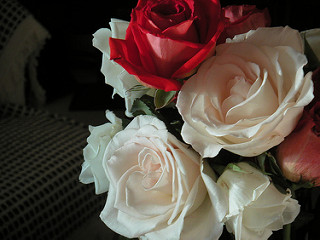

In [26]:
data_dir = pathlib.Path(data_dir)
print(f"Numbers of images: {len(list(data_dir.glob('*/*.jpg')))}") 
roses = list(data_dir.glob("roses/*.jpg"))

PIL.Image.open(str(roses[1]))

In [27]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

# get X, y data sets using a loop

X, y = [], []
for name, imgs in flowers_images_dict.items():
    for img in imgs:
        img = cv2.imread(str(img))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(flowers_labels_dict[name])
X, y = np.array(X), np.array(y)

X.shape, y.shape

((3670, 180, 180, 3), (3670,))

In [28]:
# split train test sets and scale them
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train, X_test = X_train / 255, X_test / 255

In [29]:
# define the model
model = keras.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(5, activation="linear"),
])
model.compile(optimizer="adam", loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [30]:
# train model
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 1s 9ms/step - loss: 1.2730 - accuracy: 0.4568
Epoch 2/30
86/86 [==============================] - 1s 9ms/step - loss: 0.9634 - accuracy: 0.6159
Epoch 3/30
86/86 [==============================] - 1s 9ms/step - loss: 0.7590 - accuracy: 0.7173
Epoch 4/30
86/86 [==============================] - 1s 9ms/step - loss: 0.5330 - accuracy: 0.8034
Epoch 5/30
86/86 [==============================] - 1s 8ms/step - loss: 0.3680 - accuracy: 0.8765
Epoch 6/30
86/86 [==============================] - 1s 9ms/step - loss: 0.2042 - accuracy: 0.9299
Epoch 7/30
86/86 [==============================] - 1s 9ms/step - loss: 0.1251 - accuracy: 0.9589
Epoch 8/30
86/86 [==============================] - 1s 9ms/step - loss: 0.0774 - accuracy: 0.9807
Epoch 9/30
86/86 [==============================] - 1s 9ms/step - loss: 0.0380 - accuracy: 0.9902
Epoch 10/30
86/86 [==============================] - 1s 9ms/step - loss: 0.0390 - accuracy: 0.9913
Epoch 11/30
86/86 [

In [31]:
# this model is overfitting
y_pred = model.predict(X_test)
y_pred_class = [np.argmax(x) for x in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.65      0.63       176
           1       0.65      0.66      0.66       154
           2       0.77      0.76      0.76       226
           3       0.71      0.77      0.74       150
           4       0.65      0.57      0.61       212

    accuracy                           0.68       918
   macro avg       0.68      0.68      0.68       918
weighted avg       0.68      0.68      0.68       918



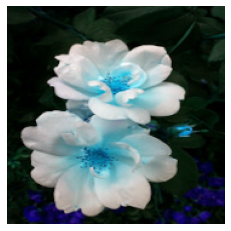

In [32]:
# Augment Data
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.2),
    keras.layers.experimental.preprocessing.RandomContrast(0.3),
])
plt.axis("off")
plt.imshow(X[0])

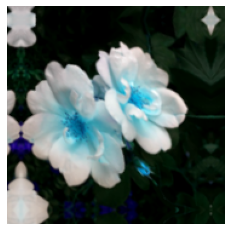

In [33]:
plt.axis("off")
plt.imshow(data_augmentation(X)[0])

In [55]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(5, activation="linear"),
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
86/86 [==============================] - 5s 45ms/step - loss: 1.3262 - accuracy: 0.4168
Epoch 2/50
86/86 [==============================] - 4s 45ms/step - loss: 1.1105 - accuracy: 0.5472
Epoch 3/50
86/86 [==============================] - 4s 45ms/step - loss: 1.0188 - accuracy: 0.5967
Epoch 4/50
86/86 [==============================] - 4s 44ms/step - loss: 0.9224 - accuracy: 0.6446
Epoch 5/50
86/86 [==============================] - 4s 42ms/step - loss: 0.8798 - accuracy: 0.6646
Epoch 6/50
86/86 [==============================] - 4s 43ms/step - loss: 0.8532 - accuracy: 0.6639
Epoch 7/50
86/86 [==============================] - 3s 33ms/step - loss: 0.8112 - accuracy: 0.6886
Epoch 8/50
86/86 [==============================] - 1s 15ms/step - loss: 0.7819 - accuracy: 0.7097
Epoch 9/50
86/86 [==============================] - 1s 15ms/step - loss: 0.7623 - accuracy: 0.7042
Epoch 10/50
86/86 [==============================] - 1s 15ms/step - loss: 0.7528 - accuracy: 0.7115
Epoch 11/

In [56]:
# Accuracy increased from 68 percent to 77 percent
y_pred = model.predict(X_test)
y_pred_class = [np.argmax(x) for x in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.77      0.69       176
           1       0.82      0.81      0.81       154
           2       0.84      0.78      0.81       226
           3       0.79      0.89      0.84       150
           4       0.78      0.65      0.71       212

    accuracy                           0.77       918
   macro avg       0.77      0.78      0.77       918
weighted avg       0.78      0.77      0.77       918



In [52]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
def better_model():
	model = Sequential([data_augmentation])

	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(180, 180, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(5, activation='softmax'))
	# compile model
	model.compile(optimizer="SGD", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
	return model


In [53]:
better_model = better_model()
better_model.fit(X_train, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 10s 32ms/step - loss: 1.7700 - accuracy: 0.3749
Epoch 2/30
86/86 [==============================] - 3s 32ms/step - loss: 1.2787 - accuracy: 0.5121
Epoch 3/30
86/86 [==============================] - 3s 32ms/step - loss: 1.1954 - accuracy: 0.5325
Epoch 4/30
86/86 [==============================] - 3s 32ms/step - loss: 1.1085 - accuracy: 0.5630
Epoch 5/30
86/86 [==============================] - 3s 32ms/step - loss: 1.0505 - accuracy: 0.5917
Epoch 6/30
86/86 [==============================] - 3s 32ms/step - loss: 1.0547 - accuracy: 0.5896
Epoch 7/30
86/86 [==============================] - 3s 32ms/step - loss: 0.9943 - accuracy: 0.6219
Epoch 8/30
86/86 [==============================] - 3s 32ms/step - loss: 0.9969 - accuracy: 0.5997
Epoch 9/30
86/86 [==============================] - 3s 32ms/step - loss: 0.9571 - accuracy: 0.6302
Epoch 10/30
86/86 [==============================] - 3s 32ms/step - loss: 0.8777 - accuracy: 0.6603
Epoch 11

In [54]:
# actually not better
y_pred = better_model.predict(X_test)
y_pred_class = [np.argmax(x) for x in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.33      0.41       176
           1       0.62      0.42      0.50       154
           2       0.34      0.94      0.50       226
           3       0.56      0.10      0.17       150
           4       0.87      0.19      0.31       212

    accuracy                           0.42       918
   macro avg       0.58      0.40      0.38       918
weighted avg       0.58      0.42      0.38       918

